# Blog 2: Logistic Regression

## Implementing Logistic Regression


## Approach to Implementation and Experimentation

Implementing the logistic regression algorithm hinged on the correct deduction of partial derivatives from the logistic loss function. My source code, [source code here](https://github.com/bridgetulian/bridgetulian.github.io/blob/main/posts/Logistic-Regression-Blog-Post/logistic_regression.py), makes use of several different class functions to calculate the gradient descent. I split my logistic loss and empirical risk functions into two separate functions, as well as my predict, sigmoid, and gradient calculations. I found this easiest when bringing all aspects together in the fit function. My fit function, therefore, is not doing all the heavy work. Most of the work is spread throughout several smaller functions. Stochastic gradient descent followed naturally from gradient descent, and implementation of aforementioned small functions helped when developing the stochastic_fit method. 


## Placement of Line in Data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


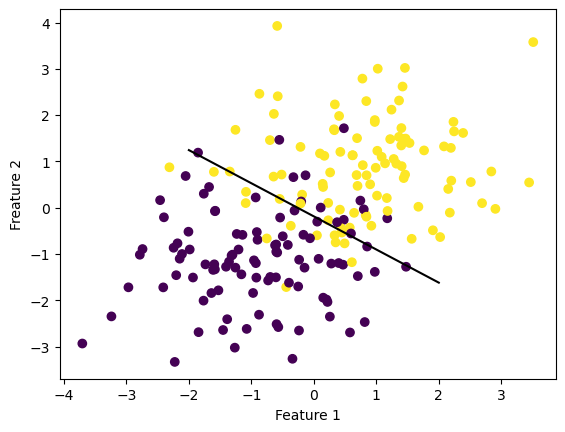

In [91]:
%load_ext autoreload
%autoreload 2
from logistic_regression import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
np.seterr(all='ignore')

p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Freature 2")

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.3, max_epochs = 1000)

LR.w

fig = draw_line(LR.w, -2, 2)


## Stochastic Gradient vs. Gradient Loss (and Convergence)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


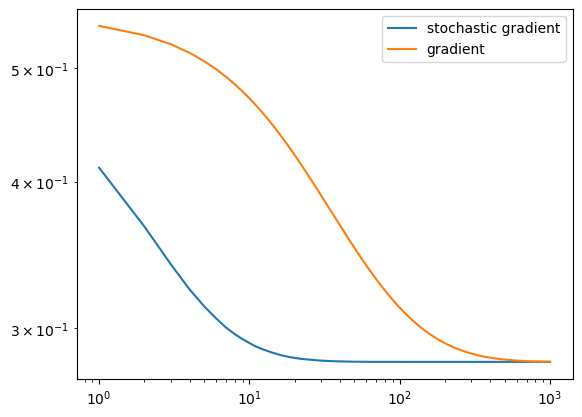

In [92]:
%load_ext autoreload
%autoreload 2
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

# Experiments

## Experiment 1: Learning Rate is Too Large

When the learning rate is too large, there is no convergence on a minimizer (as demonstrated below). 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


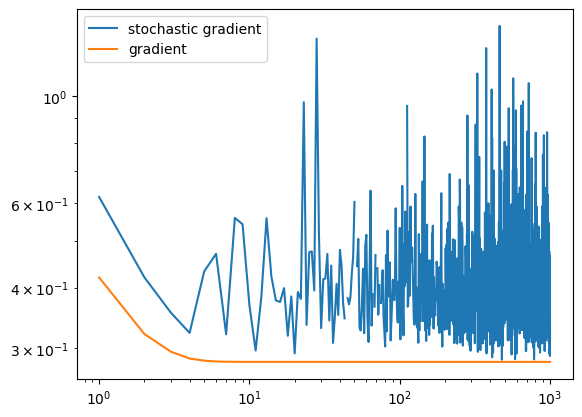

In [93]:
%load_ext autoreload
%autoreload 2

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = 10, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 


## Experiment 2: Batch Size Changes

Example 1: Batch size of 600

A higher batch size leads to a stochastic gradient descent that is much more similar to gradient descent -- converging on a minimizer slower than a smaller batch size. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


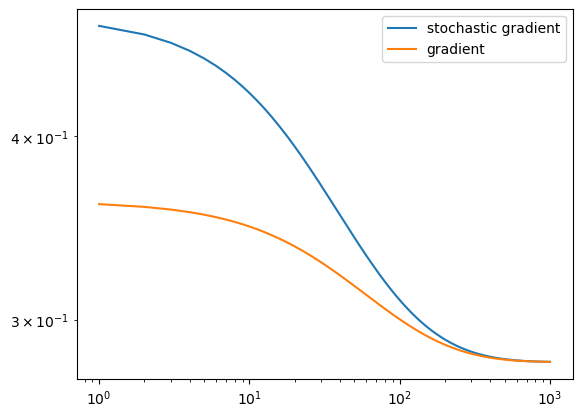

In [94]:
%load_ext autoreload
%autoreload 2

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05,
                  batch_size = 600)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

Example 2: Batch size of 10

Much more different than the gradient descent (which makes sense, seeing as stochastic gradient descent is essentially stochastic gradient descent with batch size of len(data)). Therefore converges quicker to a minimizer.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


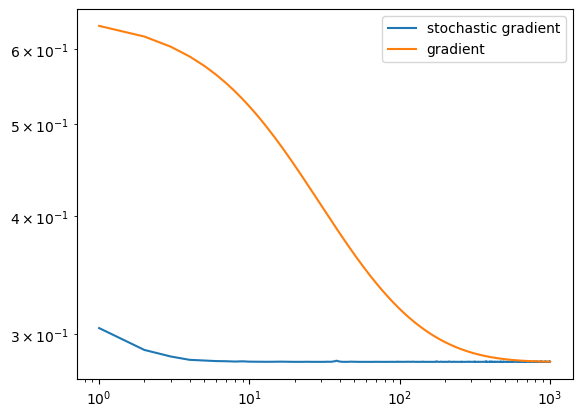

In [96]:
%load_ext autoreload
%autoreload 2
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05,
                  batch_size=2)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

## Experimentation Findings

## Learning Rate

There is a balance between finding a learning rate that finds a quick weight array to separate the data and a learning rate that is so large that it freaks out. The large alpha experiment led to no convergence, and a loss graph that demonstrates some sort of 'freak out'. Finding the correct learning rate is important in a successful logistic regression model. 

## Batch Size

A larger batch size is more similar to gradient descent, meaning that it converges to a minimizer slower than a smaller batch size. This makes sense logically (as mentioned above), because gradient descent is stochastic gradient descent with batch size len(data). 